# Data Mining Project-2023:                                    

## What Statistics lead to the most success on the PGA Tour?

    By: Joseph Opitz

### Begin Data Preprocessing and get the data ready for use:

#### Import the necessary libraries.

In [2]:
import pandas as pd

#### Create a pandas dataframe of collected data.

In [5]:
data = pd.read_csv('CleanedData.csv')
data['fin_text']

0          1
1          1
2          1
3          1
4          2
        ... 
87301    CUT
87302    CUT
87303    CUT
87304    CUT
87305    CUT
Name: fin_text, Length: 87306, dtype: object

#### Replace all non-integer values within the finish position column to make the data accessible

In [3]:
data = data.dropna(subset=['fin_text'])

data['fin_text'] = data['fin_text'].replace({'CUT': 100, 'WD': 100, 
                                             'DQ': 100, 'MDF': 100})  
data['fin_text'] = data['fin_text'].astype(int) 

#### Create columns that turn players finishing position into binary values for if the player was in the top 20 and in the top 50.

In [4]:
data['top50finish'] = (data['fin_text'] <= 50).astype(int)

data['top20finish'] = (data['fin_text'] <= 20).astype(int)

#### Remove certain columns from the data frame that are not necessary for analysis.

In [5]:
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'tour', 'year', 'season', 'event_name', 
                   'event_id', 'player_name', 'dg_id', 'fin_text', 'course_num', 'Unnamed: 0.2', 'round_num',
                  'course_par', 'start_hole', 'round_score', 'sg_total', 'course_name', 'teetime']

columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=columns_to_drop)

### Create a correlation analysis of all used statistics to compare correlation between different features.

#### Import necessary libraries

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Create a correlation analysis heat map

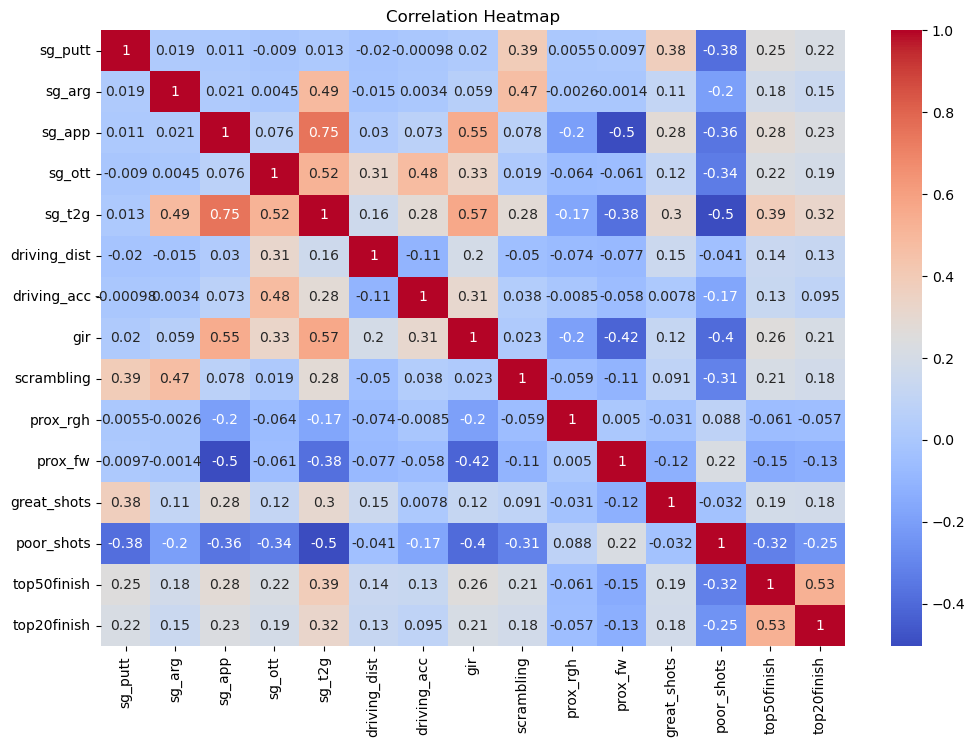

<Figure size 640x480 with 0 Axes>

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
plt.savefig('correlationheatmap.png')

#### Show the correlation between finishing in the top 20 and finishing in the top 50.

In [8]:
print('Top 20 Correlation:\n')
feature_target_correlation20 = correlation_matrix['top20finish'].sort_values(ascending=False)
feature_target_correlation20.drop(['top20finish','top50finish'], inplace=True)  # Removing the target variable itself
print(feature_target_correlation20)

print('\nTop 50 Correlation:\n')
feature_target_correlation50 = correlation_matrix['top50finish'].sort_values(ascending=False)
feature_target_correlation50.drop(['top20finish','top50finish'], inplace=True)  # Removing the target variable itself
print(feature_target_correlation50)

Top 20 Correlation:

sg_t2g          0.323015
sg_app          0.234842
sg_putt         0.215048
gir             0.209724
sg_ott          0.190056
great_shots     0.183142
scrambling      0.178565
sg_arg          0.146802
driving_dist    0.129869
driving_acc     0.094642
prox_rgh       -0.056689
prox_fw        -0.129973
poor_shots     -0.246961
Name: top20finish, dtype: float64

Top 50 Correlation:

sg_t2g          0.387721
sg_app          0.283066
gir             0.259359
sg_putt         0.250245
sg_ott          0.223742
scrambling      0.207548
great_shots     0.188773
sg_arg          0.178850
driving_dist    0.138583
driving_acc     0.132133
prox_rgh       -0.060962
prox_fw        -0.148682
poor_shots     -0.315970
Name: top50finish, dtype: float64


### Now begin Gradient Boosting Classification Model for making it into the top 20.

#### Import the necessary libraries.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

#### Split the dataset up in to features (X) and target variable (y).

In [10]:
data20 = data.drop(columns='top50finish')
X = data20.drop('top20finish', axis=1)
y = data20['top20finish']
print(X)

       sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  driving_dist  driving_acc  \
0        1.094  -0.015   2.851   2.008   4.844         305.4        0.714   
1        0.931  -0.687   0.834   1.036   1.184         305.5        0.571   
2       -1.089   0.739   3.174  -1.624   2.290         313.4        0.500   
3       -0.886   0.917   1.546   2.436   4.899         322.1        0.857   
4        1.502   0.805   1.417   0.213   2.436         288.1        0.429   
...        ...     ...     ...     ...     ...           ...          ...   
87301   -2.126  -1.326  -1.406  -0.385  -3.117         292.2        0.692   
87302   -5.419  -0.719   0.306   0.033  -0.380         285.8        0.769   
87303   -3.724  -1.489  -0.207  -0.823  -2.519         288.3        0.385   
87304   -1.488  -3.343  -3.376  -0.592  -7.311         271.3        0.615   
87305   -2.120  -0.429  -3.277  -0.417  -4.123         275.2        0.769   

         gir  scrambling  prox_rgh  prox_fw  great_shots  poor_shots  
0   

#### Create train and test variables.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create and train the model

In [12]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

#### Evaluate the model

In [13]:
y_pred20 = model.predict(X_test)
accuracy20 = accuracy_score(y_test, y_pred20)
report20 = classification_report(y_test, y_pred20)

print('Top 20 Finish:')
print('Accuracy: \n', round(accuracy20,4))
print('Classification Report: \n', report20)

Top 20 Finish:
Accuracy: 
 0.791
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88     13510
           1       0.59      0.25      0.35      3952

    accuracy                           0.79     17462
   macro avg       0.70      0.60      0.61     17462
weighted avg       0.76      0.79      0.76     17462



#### Figure out which features led to the most top 20s.

In [14]:
feature_importances20 = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances20 = feature_importances20.sort_values(by='Importance', ascending=False)
print('Most important features to finish in the top 20: ')
print('-------------------------------------------------')
print(feature_importances20)

Most important features to finish in the top 20: 
-------------------------------------------------
         Feature  Importance
4         sg_t2g    0.605027
0        sg_putt    0.267912
5   driving_dist    0.056608
12    poor_shots    0.029702
3         sg_ott    0.007697
8     scrambling    0.006410
6    driving_acc    0.006070
7            gir    0.005343
10       prox_fw    0.004706
9       prox_rgh    0.004158
2         sg_app    0.003140
1         sg_arg    0.002400
11   great_shots    0.000829


### Now begin the analysis of players that are within the top 50.

#### Reassign target variable (y) and features (X)

In [15]:
data50 = data.drop(columns='top20finish')
X = data50.drop('top50finish', axis=1)
y = data50['top50finish']

#### Split up the variables up into train and test variables

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create and train the model

In [17]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

#### Evaluate the model

In [18]:
y_pred50 = model.predict(X_test)
accuracy50 = accuracy_score(y_test, y_pred50)
report50 = classification_report(y_test, y_pred50)

print('Top 50 Finish:')
print('Accuracy: \n', round(accuracy50,4))
print('Classification Report: \n', report50)

Top 50 Finish:
Accuracy: 
 0.7044
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.67      0.69      8424
           1       0.71      0.74      0.72      9038

    accuracy                           0.70     17462
   macro avg       0.70      0.70      0.70     17462
weighted avg       0.70      0.70      0.70     17462



#### Figure out which features led to the most top 50 finishes

In [19]:
feature_importances50 = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances50 = feature_importances50.sort_values(by='Importance', ascending=False)
print('Most important features to finish in the top 50: ')
print('-------------------------------------------------')
print(feature_importances50)

Most important features to finish in the top 50: 
-------------------------------------------------
         Feature  Importance
4         sg_t2g    0.611714
0        sg_putt    0.252822
12    poor_shots    0.053805
5   driving_dist    0.044014
6    driving_acc    0.015137
7            gir    0.006817
8     scrambling    0.003824
3         sg_ott    0.003477
9       prox_rgh    0.002455
10       prox_fw    0.002238
2         sg_app    0.002006
1         sg_arg    0.001432
11   great_shots    0.000259
